## Frequent patterns and association rules

In [55]:
import sys 
sys.path.insert(1, "../utils")

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import utils

In [78]:
from utils import load_data
data = load_data('../Data/Dataset3.csv')

In [79]:
data.iloc[0,0] 
data.head(10)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
5,20.82,84.13,230.22,clay loam,rice,Urea
6,25.95,93.41,172.05,alluvial,Coconut,Urea
7,26.49,80.16,242.86,Clayey,rice,DAP
8,25.01,95.59,165.81,coastal,Coconut,Urea
9,21.87,80.19,224.56,silty clay,rice,Urea


In [80]:
from utils import describe_column
colonnes_description = describe_column(data)
pd.DataFrame(colonnes_description, columns = ["Name","Non-null value","Type"])

,Name,Non-null value,Type
0,Temperature,295,float64
1,Humidity,295,float64
2,Rainfall,295,float64
3,Soil,295,object
4,Crop,295,object
5,Fertilizer,295,object


<h1>2.1. Discrétisation des données 

<h2>a- Classes d’effectifs égaux (equal frequency)

In [88]:
column_name = "Rainfall"
df_after = utils.equal_width_disc(data, column_name, 1)
df_after

AttributeError: module 'utils' has no attribute 'equal_width_disc'

In [61]:
from utils import equal_frequency_discretization
df_after2 = equal_frequency_discretization(data, column_name, 1)
df_after2


,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Discretized
0,24.87,82.84,295.61,Clayey,rice,DAP,9
1,28.69,96.65,178.96,laterite,Coconut,Good NPK,3
2,20.27,81.64,270.44,silty clay,rice,MOP,9
3,25.07,95.02,192.90,sandy,Coconut,Urea,4
4,25.04,95.90,174.80,coastal,Coconut,Urea,3
...,...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP,1
291,25.63,83.53,209.90,silty clay,rice,MOP,6
292,24.52,83.54,230.45,Clayey,rice,MOP,7
293,25.66,83.47,217.38,Clayey,rice,MOP,6


In [62]:
from utils import plot_before_after_discretization
attributes = data.columns

for attribute in attributes:
    plot_before_after_discretization(data, attribute, df_after, df_after2)
    

NameError: name 'df_after' is not defined

<h1>2.2. Extraction des motifs fréquents et règles d’association 

<h2>Motifs fréquents

In [63]:

df = equal_frequency_discretization(data, column_name, 2)
grouped = df_after2.groupby('Soil').agg({
    'Discretized': set,
    #'Humidity': set,
    #'Crop': set,
    #'Fertilizer': set
   
   
}).reset_index()


In [64]:
grouped

,Soil,Discretized
0,Clayey,"{5, 3, 8, 7, 6, 4, 9}"
1,alluvial,"{3, 5, 2, 1, 7, 6, 4}"
2,clay loam,"{5, 3, 8, 7, 6, 4, 9}"
3,coastal,"{3, 5, 2, 1, 7, 6, 4}"
4,laterite,"{3, 5, 2, 1, 7, 6, 4}"
5,sandy,"{3, 5, 2, 1, 7, 6, 4}"
6,silty clay,"{5, 3, 8, 7, 6, 4, 9}"


In [66]:
dataset = df_after2.groupby('Soil').agg({
    # 'Discretized': set,
    'Fertilizer': set
}).reset_index()
dataset


,Soil,Fertilizer
0,Clayey,"{DAP, Good NPK, Urea, MOP}"
1,alluvial,"{DAP, Urea, MOP}"
2,clay loam,"{DAP, Good NPK, Urea, MOP}"
3,coastal,"{DAP, MOP, Urea, Good NPK}"
4,laterite,"{DAP, MOP, Urea, Good NPK}"
5,sandy,"{DAP, MOP, Urea, Good NPK}"
6,silty clay,"{Urea, MOP, Good NPK, DAP}"


<h3>Apriori

In [67]:
import appriori

In [68]:
data = []
for index, row in dataset.iterrows():
    fertilizers = row['Fertilizer']
    data.append(set(fertilizers))
min_supports = [1,2,3, 4, 5, 6]
min_correlations = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8, 0.9]
min_confidences = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8, 0.9]
for min_support in min_supports:
    for min_confidence in min_confidences:
        for min_correlation in min_correlations:
            association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "confidence")
            with open('../Data/results_fert.csv', 'a') as f:
                f.write(f"{min_support},{min_confidence},{min_correlation},{nombre_itemsets},{nomber_regles}\n")

In [69]:
data = []
for index, row in grouped.iterrows():
    desc = row['Discretized']
    data.append(set(desc))
min_supports = [1,2,3, 4, 5, 6]
min_confidences = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8, 0.9]
min_correlations = [0.1,0.2,0.3,0.4, 0.5, 0.6, 0.7,0.8, 0.9]
for min_support in min_supports:
    for min_confidence in min_confidences:
        for min_correlation in min_correlations:
            association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "confidence")
            with open('../Data/results_desc.csv', 'a') as f:
                f.write(f"{min_support},{min_confidence},{min_correlation},{nombre_itemsets},{nomber_regles}\n")

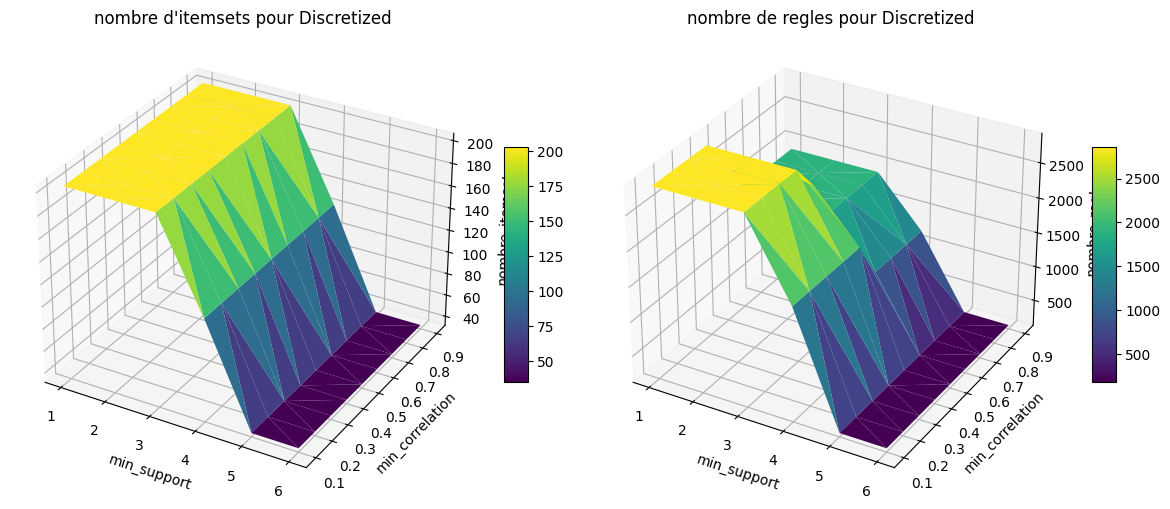

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from matplotlib import cm

res_desc = pd.read_csv('../Data/results_desc.csv', names=['min_support', 'min_confidence', 'min_correlation','nombre_itemsets', 'nombre_regles'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})


surf1 = ax1.plot_trisurf(res_desc['min_support'], res_desc['min_correlation'], res_desc['nombre_itemsets'], cmap=cm.viridis)
ax1.set_xlabel('min_support')
ax1.set_ylabel('min_correlation')
ax1.set_zlabel('nombre_itemsets')
ax1.set_title("nombre d'itemsets pour Discretized")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

surf2 = ax2.plot_trisurf(res_desc['min_support'], res_desc['min_confidence'], res_desc['nombre_regles'], cmap=cm.viridis)
ax2.set_xlabel('min_support')
ax2.set_ylabel('min_correlation')
ax2.set_zlabel('nombre_regles')
ax2.set_title('nombre de regles pour Discretized')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()


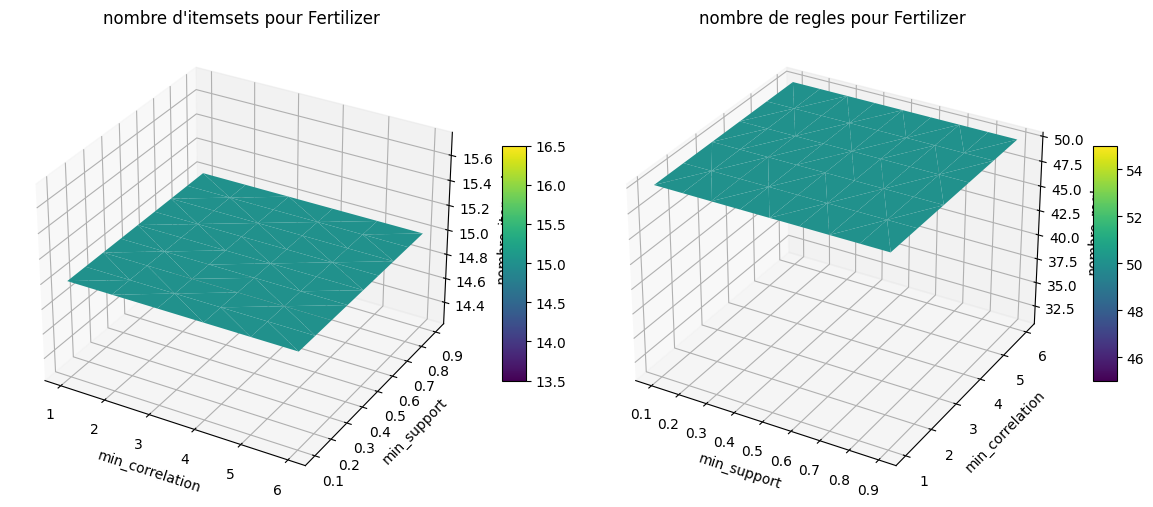

In [71]:
res_fert = pd.read_csv('../Data/results_fert.csv', names=['min_support', 'min_confidence', 'min_correlation','nombre_itemsets', 'nombre_regles'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
surf1 = ax1.plot_trisurf(res_fert['min_support'], res_fert['min_correlation'], res_fert['nombre_itemsets'], cmap=cm.viridis)
ax1.set_xlabel('min_correlation')
ax1.set_ylabel('min_support')
ax1.set_zlabel('nombre_itemsets')
ax1.set_title("nombre d'itemsets pour Fertilizer")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

surf2 = ax2.plot_trisurf(res_fert['min_correlation'], res_fert['min_support'], res_fert['nombre_regles'], cmap=cm.viridis)
ax2.set_xlabel('min_support')
ax2.set_ylabel('min_correlation')
ax2.set_zlabel('nombre_regles')
ax2.set_title('nombre de regles pour Fertilizer')
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

plt.tight_layout()

plt.show()



In [72]:
data = []
for index, row in dataset.iterrows():
    fertilizers = row['Fertilizer']
    data.append(set(fertilizers))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "confidence")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}")

Nombre d'itemsets fréquents: 15
Nombre de règles d'association: 31
['Urea'] => ['MOP'] - Conf: 1.0
['MOP'] => ['Urea'] - Conf: 1.0
['DAP'] => ['Urea'] - Conf: 1.0
['Urea'] => ['DAP'] - Conf: 1.0
['Good NPK'] => ['MOP'] - Conf: 1.0
['Good NPK'] => ['DAP'] - Conf: 1.0
['Good NPK'] => ['Urea'] - Conf: 1.0
['DAP'] => ['MOP'] - Conf: 1.0
['MOP'] => ['DAP'] - Conf: 1.0
['Good NPK'] => ['DAP', 'Urea'] - Conf: 1.0
['DAP', 'Good NPK'] => ['Urea'] - Conf: 1.0
['Urea', 'Good NPK'] => ['DAP'] - Conf: 1.0
['Good NPK'] => ['DAP', 'MOP'] - Conf: 1.0
['DAP', 'Good NPK'] => ['MOP'] - Conf: 1.0
['MOP', 'Good NPK'] => ['DAP'] - Conf: 1.0
['Good NPK'] => ['Urea', 'MOP'] - Conf: 1.0
['Urea', 'Good NPK'] => ['MOP'] - Conf: 1.0
['MOP', 'Good NPK'] => ['Urea'] - Conf: 1.0
['DAP'] => ['Urea', 'MOP'] - Conf: 1.0
['Urea'] => ['DAP', 'MOP'] - Conf: 1.0
['MOP'] => ['DAP', 'Urea'] - Conf: 1.0
['DAP', 'Urea'] => ['MOP'] - Conf: 1.0
['DAP', 'MOP'] => ['Urea'] - Conf: 1.0
['Urea', 'MOP'] => ['DAP'] - Conf: 1.0
['Good 

In [73]:
data = []
for index, row in grouped.iterrows():
    desc = row['Discretized']
    data.append(set(desc))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "confidence")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}")

Nombre d'itemsets fréquents: 35
Nombre de règles d'association: 180
['3'] => ['7'] - Conf: 1.0
['7'] => ['3'] - Conf: 1.0
['5'] => ['6'] - Conf: 1.0
['6'] => ['5'] - Conf: 1.0
['5'] => ['3'] - Conf: 1.0
['3'] => ['5'] - Conf: 1.0
['7'] => ['6'] - Conf: 1.0
['6'] => ['7'] - Conf: 1.0
['6'] => ['4'] - Conf: 1.0
['4'] => ['6'] - Conf: 1.0
['7'] => ['4'] - Conf: 1.0
['4'] => ['7'] - Conf: 1.0
['5'] => ['7'] - Conf: 1.0
['7'] => ['5'] - Conf: 1.0
['3'] => ['4'] - Conf: 1.0
['4'] => ['3'] - Conf: 1.0
['3'] => ['6'] - Conf: 1.0
['6'] => ['3'] - Conf: 1.0
['5'] => ['4'] - Conf: 1.0
['4'] => ['5'] - Conf: 1.0
['5'] => ['7', '4'] - Conf: 1.0
['7'] => ['5', '4'] - Conf: 1.0
['4'] => ['5', '7'] - Conf: 1.0
['5', '7'] => ['4'] - Conf: 1.0
['5', '4'] => ['7'] - Conf: 1.0
['7', '4'] => ['5'] - Conf: 1.0
['5'] => ['7', '6'] - Conf: 1.0
['7'] => ['5', '6'] - Conf: 1.0
['6'] => ['5', '7'] - Conf: 1.0
['5', '7'] => ['6'] - Conf: 1.0
['5', '6'] => ['7'] - Conf: 1.0
['7', '6'] => ['5'] - Conf: 1.0
['5'] =>

Avec lift

In [74]:
data = []
for index, row in dataset.iterrows():
    fertilizers = row['Fertilizer']
    data.append(set(fertilizers))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "lift")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, correlation, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}, Corr: {correlation}")

Nombre d'itemsets fréquents: 15
Nombre de règles d'association: 31
['Urea'] => ['MOP'] - Conf: 1.0, Corr: 0.14285714285714285
['MOP'] => ['Urea'] - Conf: 1.0, Corr: 0.14285714285714285
['DAP'] => ['Urea'] - Conf: 1.0, Corr: 0.14285714285714285
['Urea'] => ['DAP'] - Conf: 1.0, Corr: 0.14285714285714285
['Good NPK'] => ['MOP'] - Conf: 1.0, Corr: 0.16666666666666666
['Good NPK'] => ['DAP'] - Conf: 1.0, Corr: 0.16666666666666666
['Good NPK'] => ['Urea'] - Conf: 1.0, Corr: 0.16666666666666666
['DAP'] => ['MOP'] - Conf: 1.0, Corr: 0.14285714285714285
['MOP'] => ['DAP'] - Conf: 1.0, Corr: 0.14285714285714285
['Good NPK'] => ['DAP', 'Urea'] - Conf: 1.0, Corr: 0.16666666666666666
['DAP', 'Good NPK'] => ['Urea'] - Conf: 1.0, Corr: 0.16666666666666666
['Urea', 'Good NPK'] => ['DAP'] - Conf: 1.0, Corr: 0.16666666666666666
['Good NPK'] => ['DAP', 'MOP'] - Conf: 1.0, Corr: 0.16666666666666666
['DAP', 'Good NPK'] => ['MOP'] - Conf: 1.0, Corr: 0.16666666666666666
['MOP', 'Good NPK'] => ['DAP'] - Conf:

In [75]:
data = []
for index, row in grouped.iterrows():
    desc = row['Discretized']
    data.append(set(desc))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "lift")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, correlation, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}, Corr: {correlation}")

Nombre d'itemsets fréquents: 35
Nombre de règles d'association: 180
['3'] => ['7'] - Conf: 1.0, Corr: 0.14285714285714285
['7'] => ['3'] - Conf: 1.0, Corr: 0.14285714285714285
['5'] => ['6'] - Conf: 1.0, Corr: 0.14285714285714285
['6'] => ['5'] - Conf: 1.0, Corr: 0.14285714285714285
['5'] => ['3'] - Conf: 1.0, Corr: 0.14285714285714285
['3'] => ['5'] - Conf: 1.0, Corr: 0.14285714285714285
['7'] => ['6'] - Conf: 1.0, Corr: 0.14285714285714285
['6'] => ['7'] - Conf: 1.0, Corr: 0.14285714285714285
['6'] => ['4'] - Conf: 1.0, Corr: 0.14285714285714285
['4'] => ['6'] - Conf: 1.0, Corr: 0.14285714285714285
['7'] => ['4'] - Conf: 1.0, Corr: 0.14285714285714285
['4'] => ['7'] - Conf: 1.0, Corr: 0.14285714285714285
['5'] => ['7'] - Conf: 1.0, Corr: 0.14285714285714285
['7'] => ['5'] - Conf: 1.0, Corr: 0.14285714285714285
['3'] => ['4'] - Conf: 1.0, Corr: 0.14285714285714285
['4'] => ['3'] - Conf: 1.0, Corr: 0.14285714285714285
['3'] => ['6'] - Conf: 1.0, Corr: 0.14285714285714285
['6'] => ['3']

Avec cosin

In [76]:
data = []
for index, row in dataset.iterrows():
    fertilizers = row['Fertilizer']
    data.append(set(fertilizers))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "cosine")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, correlation, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}, Corr: {correlation}")

Nombre d'itemsets fréquents: 15
Nombre de règles d'association: 50
['Urea'] => ['MOP'] - Conf: 1.0, Corr: 1.0
['MOP'] => ['Urea'] - Conf: 1.0, Corr: 1.0
['DAP'] => ['Urea'] - Conf: 1.0, Corr: 1.0
['Urea'] => ['DAP'] - Conf: 1.0, Corr: 1.0
['MOP'] => ['Good NPK'] - Conf: 0.8571428571428571, Corr: 0.9258200997725514
['Good NPK'] => ['MOP'] - Conf: 1.0, Corr: 0.9258200997725514
['DAP'] => ['Good NPK'] - Conf: 0.8571428571428571, Corr: 0.9258200997725514
['Good NPK'] => ['DAP'] - Conf: 1.0, Corr: 0.9258200997725514
['Urea'] => ['Good NPK'] - Conf: 0.8571428571428571, Corr: 0.9258200997725514
['Good NPK'] => ['Urea'] - Conf: 1.0, Corr: 0.9258200997725514
['DAP'] => ['MOP'] - Conf: 1.0, Corr: 1.0
['MOP'] => ['DAP'] - Conf: 1.0, Corr: 1.0
['DAP'] => ['Urea', 'Good NPK'] - Conf: 0.8571428571428571, Corr: 0.9258200997725514
['Urea'] => ['DAP', 'Good NPK'] - Conf: 0.8571428571428571, Corr: 0.9258200997725514
['Good NPK'] => ['DAP', 'Urea'] - Conf: 1.0, Corr: 0.9258200997725514
['DAP', 'Urea'] =>

In [77]:
data = []
for index, row in grouped.iterrows():
    desc = row['Discretized']
    data.append(set(desc))
min_support = 5
min_confidence = 0.9
min_correlation = 0.1
association_rules, nombre_itemsets, nomber_regles = appriori.regles_d_association(data, min_support, min_confidence, min_correlation, "cosine")
print(f"Nombre d'itemsets fréquents: {nombre_itemsets}")
print(f"Nombre de règles d'association: {nomber_regles}")
for rule in association_rules:
    A, B, confidence, correlation, sup= rule
    print(f"{list(A)} => {list(B)} - Conf: {confidence}, Corr: {correlation}")

Nombre d'itemsets fréquents: 35
Nombre de règles d'association: 180
['3'] => ['7'] - Conf: 1.0, Corr: 1.0
['7'] => ['3'] - Conf: 1.0, Corr: 1.0
['5'] => ['6'] - Conf: 1.0, Corr: 1.0
['6'] => ['5'] - Conf: 1.0, Corr: 1.0
['5'] => ['3'] - Conf: 1.0, Corr: 1.0
['3'] => ['5'] - Conf: 1.0, Corr: 1.0
['7'] => ['6'] - Conf: 1.0, Corr: 1.0
['6'] => ['7'] - Conf: 1.0, Corr: 1.0
['6'] => ['4'] - Conf: 1.0, Corr: 1.0
['4'] => ['6'] - Conf: 1.0, Corr: 1.0
['7'] => ['4'] - Conf: 1.0, Corr: 1.0
['4'] => ['7'] - Conf: 1.0, Corr: 1.0
['5'] => ['7'] - Conf: 1.0, Corr: 1.0
['7'] => ['5'] - Conf: 1.0, Corr: 1.0
['3'] => ['4'] - Conf: 1.0, Corr: 1.0
['4'] => ['3'] - Conf: 1.0, Corr: 1.0
['3'] => ['6'] - Conf: 1.0, Corr: 1.0
['6'] => ['3'] - Conf: 1.0, Corr: 1.0
['5'] => ['4'] - Conf: 1.0, Corr: 1.0
['4'] => ['5'] - Conf: 1.0, Corr: 1.0
['5'] => ['7', '4'] - Conf: 1.0, Corr: 1.0
['7'] => ['5', '4'] - Conf: 1.0, Corr: 1.0
['4'] => ['5', '7'] - Conf: 1.0, Corr: 1.0
['5', '7'] => ['4'] - Conf: 1.0, Corr: 1.0
